In [96]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,8)
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df = pd.read_csv('Series/weekly-closings-of-the-dowjones-.csv')

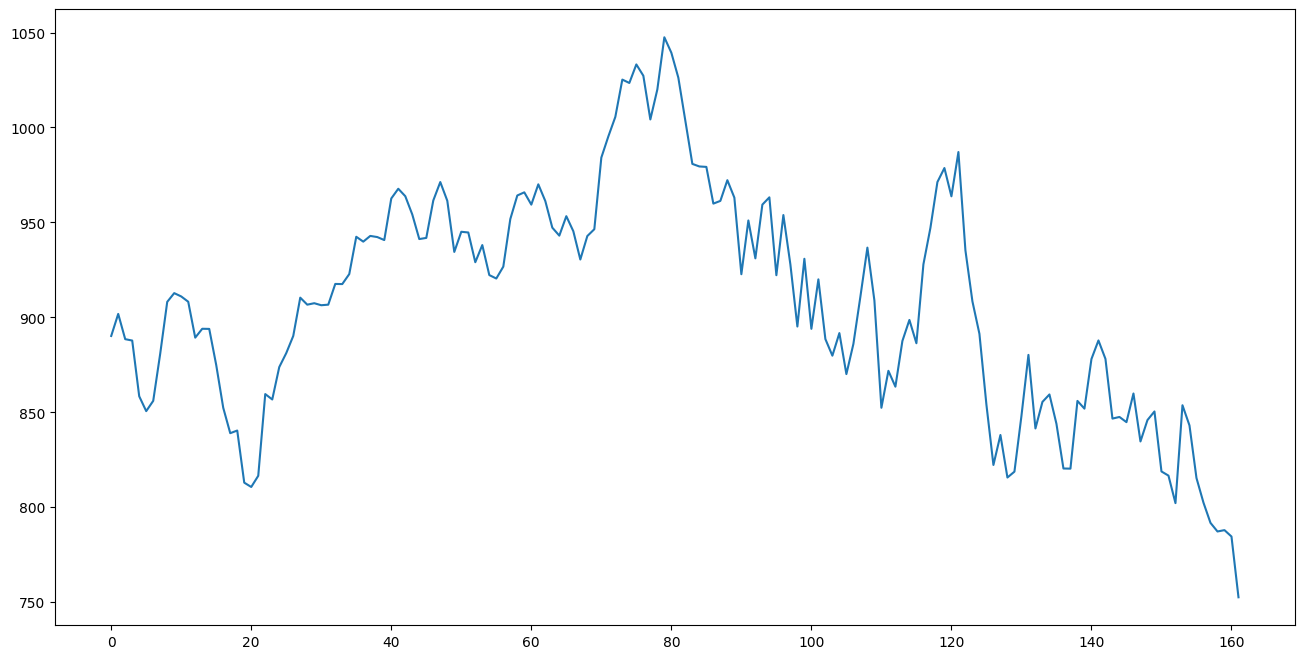

In [5]:
plt.plot(df['Close'])

На графике видно 2 локальных тренда, обычно в таком случае первая часть графика обрезается для получения точного прогноза

In [12]:
new_df = df['Close'][int(len(df['Close'])* 0.49):]

In [25]:
new_df = new_df.reset_index()['Close']

Попытаемся предсказать следующие 5 значений

В качестве p, d, q возьмем 2, 1, 2. Так как доказано, что p + d + q <= 6, поэтому можно просто перебрать варианты.

In [66]:
model = ARIMA(new_df, order=(2, 1, 2))
arima_model = model.fit()

In [67]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   83
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -371.370
Date:                Thu, 08 Jun 2023   AIC                            752.740
Time:                        11:08:06   BIC                            764.774
Sample:                             0   HQIC                           757.572
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6500      0.019    -88.236      0.000      -1.687      -1.613
ar.L2         -0.9959      0.019    -52.299      0.000      -1.033      -0.959
ma.L1          1.6688      0.307      5.439      0.0

In [89]:
pred = arima_model.predict(0, len(new_df) + 5)

In [90]:
pred = pred.drop(0).reset_index()['predicted_mean']

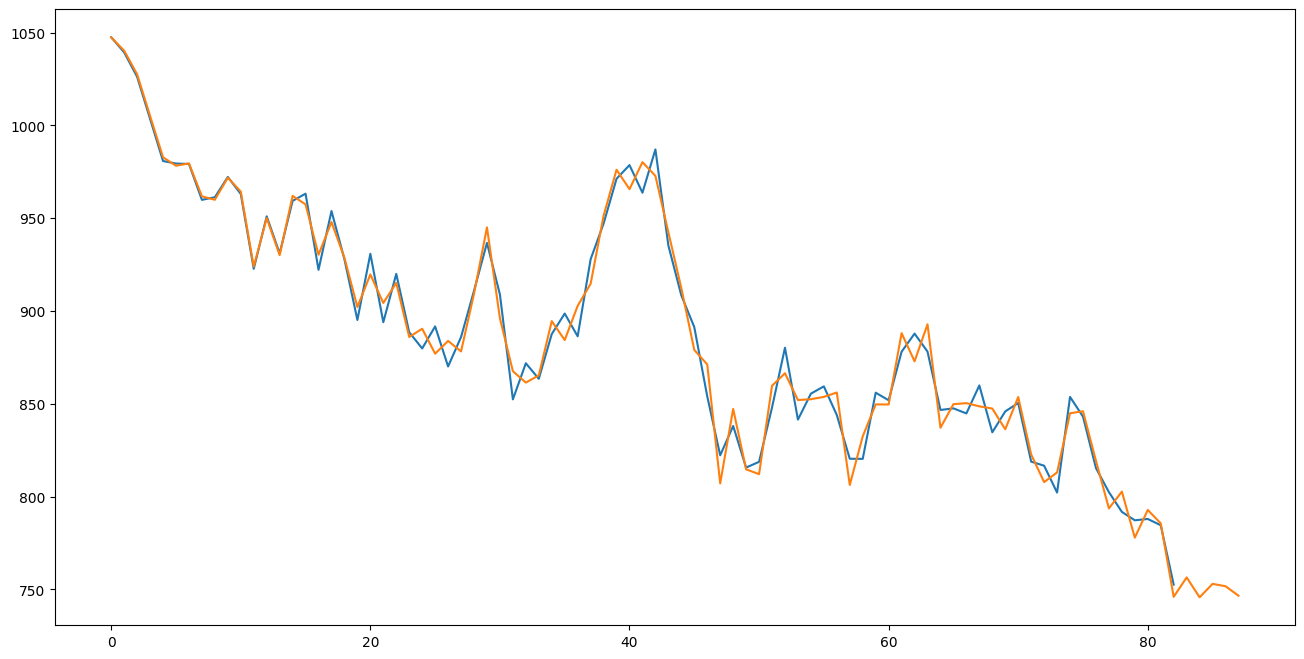

In [91]:
plt.plot(new_df)
plt.plot(pred)
plt.show()

In [97]:
mape(new_df, pred[:-5])

0.008471346943095584

В результате мы получаем хорошо обученную модель, которая на котороткий промежуток времени сможет дать довольно точные прогнозы